In [84]:
# Introducción
# Este notebook contiene análisis de Clustering, Reglas de Asociación y Análisis de Componentes Principales
# sobre un dataset de películas. Se utilizarán diversas técnicas de preprocesamiento y análisis para extraer
# información relevante.

# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.decomposition import PCA
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import numpy as np
import vat
import random
import pyclustertend
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import pairwise_distances
from factor_analyzer.factor_analyzer import calculate_kmo


# Verificar que todo funciona bien
print("Librerías importadas correctamente")


Librerías importadas correctamente


In [33]:
# Cargar el dataset
file_path = "movies.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

# Mostrar las primeras filas para exploración
df.head()


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,9/12/1995,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,15/10/1993,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,25/05/1977,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,30/05/2003,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,6/07/1994,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


In [34]:
df.describe()


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,249876.829300,1.855163e+07,5.673753e+07,100.268100,51.407835,6.483243,1342.888055,2.595538,3.170768,1.750100,2148.520208
std,257380.109004,3.662669e+07,1.495826e+08,27.777829,216.771736,0.984324,2564.584239,1.153534,2.539207,3.010566,37207.494312
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.580500,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.912000,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.660750,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


In [35]:
# Mostrar primeras filas para exploración inicial
df.head()


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,9/12/1995,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,15/10/1993,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,25/05/1977,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,30/05/2003,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,6/07/1994,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


# CLUSTERING

1.1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [36]:
# Selección de variables para clustering
columns_to_use = ['budget', 'revenue', 'popularity', 'voteAvg',
                  'actorsAmount', 'castWomenAmount', 'castMenAmount']

# Filtrar solo las columnas que realmente están en el dataset
columns_to_use = [col for col in columns_to_use if col in df.columns]

# Reemplazar valores no numéricos o nulos en todas las columnas seleccionadas por 0
df[columns_to_use] = df[columns_to_use].apply(pd.to_numeric, errors='coerce').fillna(0)

# Seleccionar solo las columnas relevantes
data = df[columns_to_use]

# Variables que no se utilizarán y su justificación
unused_columns = ['id', 'genres', 'runtime', 'homePage', 'video', 'director', 'actors', 'originalTitle',
                  'title', 'originalLanguage', 'releaseDate', 'actorsPopularity', 'productionCountriesAmount',
                  'productionCoAmount', 'genresAmount', 'voteCount', 'actorsCharacter', 'productionCountry',
                  'productionCompanyCountry', 'productionCompany']

# Eliminar solo las columnas que existen en df (para evitar errores)
df = df.drop(columns=[col for col in unused_columns if col in df.columns])

# Normalizar los datos en el rango [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)

# Convertir de nuevo a DataFrame con los nombres originales de las columnas
df_scaled = pd.DataFrame(data_scaled, columns=columns_to_use)

# Mostrar las primeras filas después de la transformación
df_scaled.head()


,budget,revenue,popularity,voteAvg,actorsAmount,castWomenAmount,castMenAmount
0,-0.978947,-0.997009,-0.996361,0.14,-0.999946,-0.999967,-0.999980
1,-0.889474,-0.991475,-0.998327,0.30,-0.999967,-0.999993,-0.999980
2,-0.942105,-0.455335,-0.982570,0.64,-0.999772,-0.999989,-0.999866
3,-0.505263,-0.339477,-0.976568,0.56,-0.999948,-0.999989,-0.999961
4,-0.710526,-0.524180,-0.989760,0.70,-0.999835,-0.999961,-0.999896



1.2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las dimensiones del conjunto de datos. Discuta sus resultados e impresiones.


Estadística de Hopkins: 0.0060


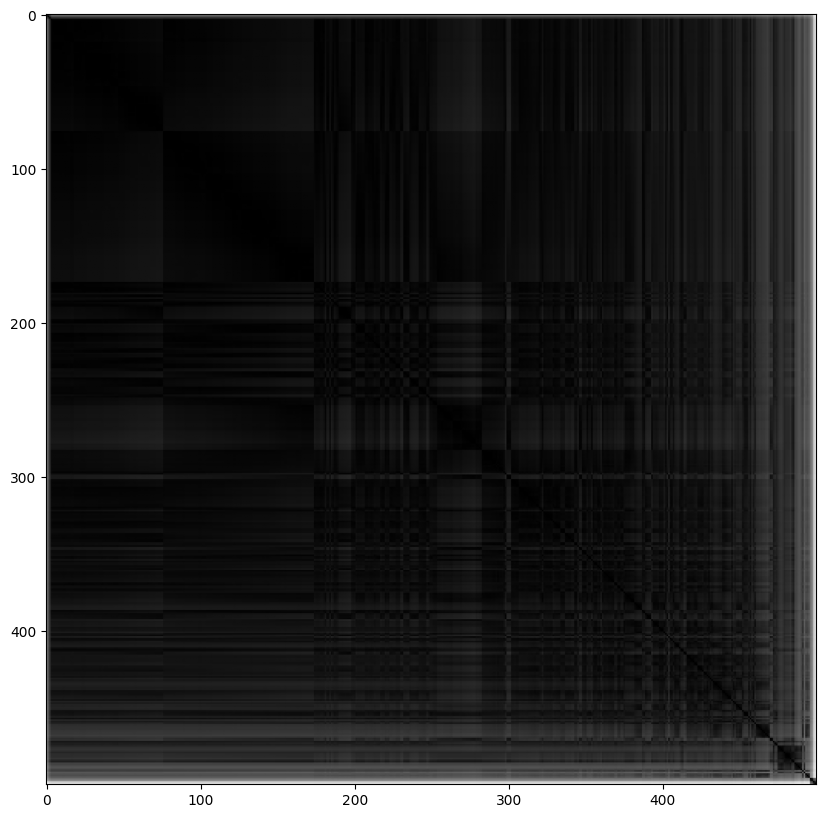

In [37]:
# Fijar la semilla para obtener resultados reproducibles
random.seed(123)

# Escalar los datos para normalización
X_scale = sklearn.preprocessing.scale(data_scaled)

# Calcular la estadística de Hopkins
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat:.4f}')

# Aplicar VAT con una muestra de datos si el tamaño es grande
X_scale = StandardScaler().fit_transform(data)
if X_scale.shape[0] > 500:
    X_sampled = X_scale[random.sample(range(X_scale.shape[0]), 500), :]
else:
    X_sampled = X_scale
pyclustertend.vat(X_sampled)

Dado que el estadístico de Hopkins indica que los datos no son aleatorios ya que no son 0.5 o cercanos a este numero y el gráfico VAT muestra bloques oscuros, hay una base sólida para proceder con el análisis de agrupamiento.


1.3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.


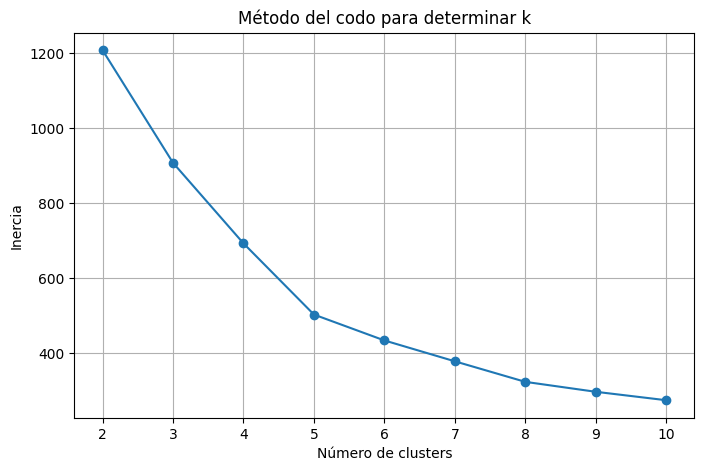

In [38]:
# Determinar el número óptimo de clusters con la gráfica del codo
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k')
plt.grid(True)
plt.show()


En este caso vamos a elegir 4 clusters ya que aunque la gráfica del codo no muestra un punto de inflexión claro, alrededor de k=4 la reducción de la inercia comienza a ser menos pronunciada, lo que indica que agregar más clusters no aporta una mejora significativa en la compactación de los grupos.


1.4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno.


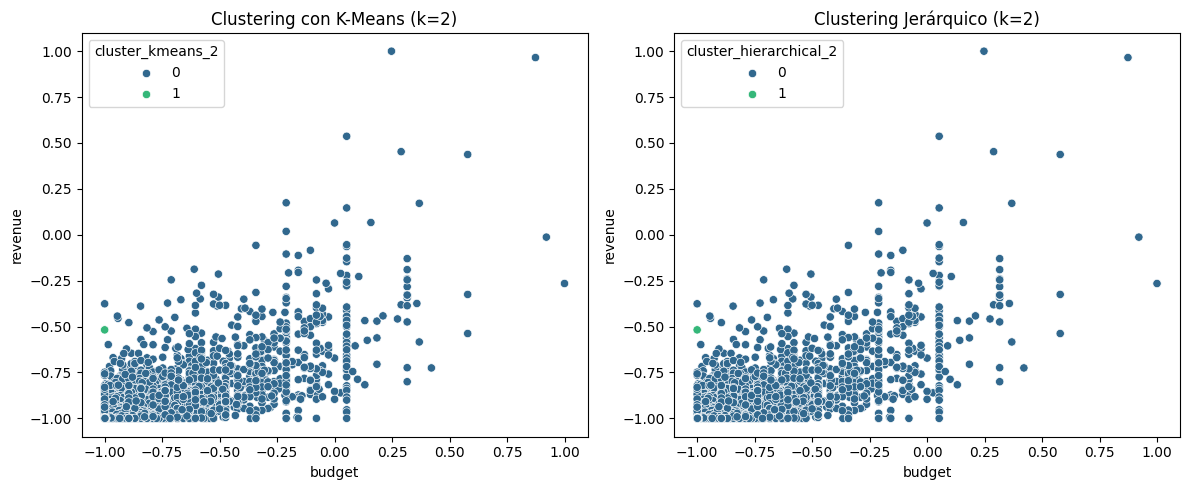

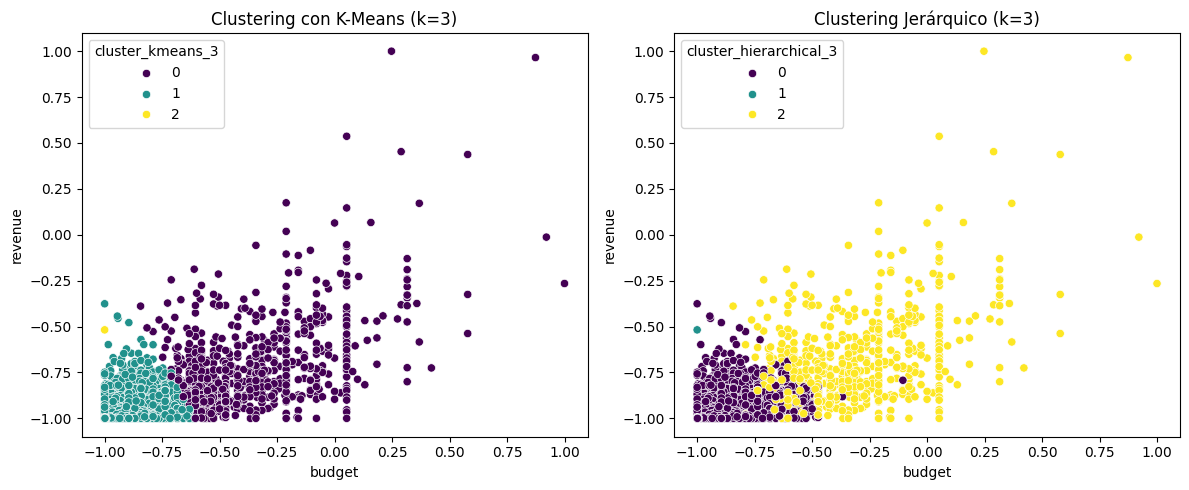

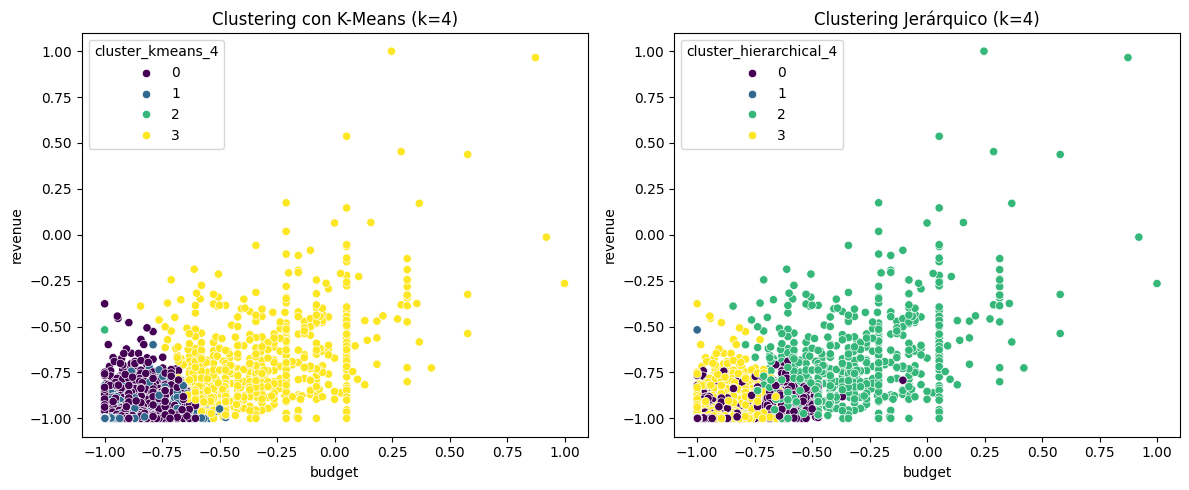

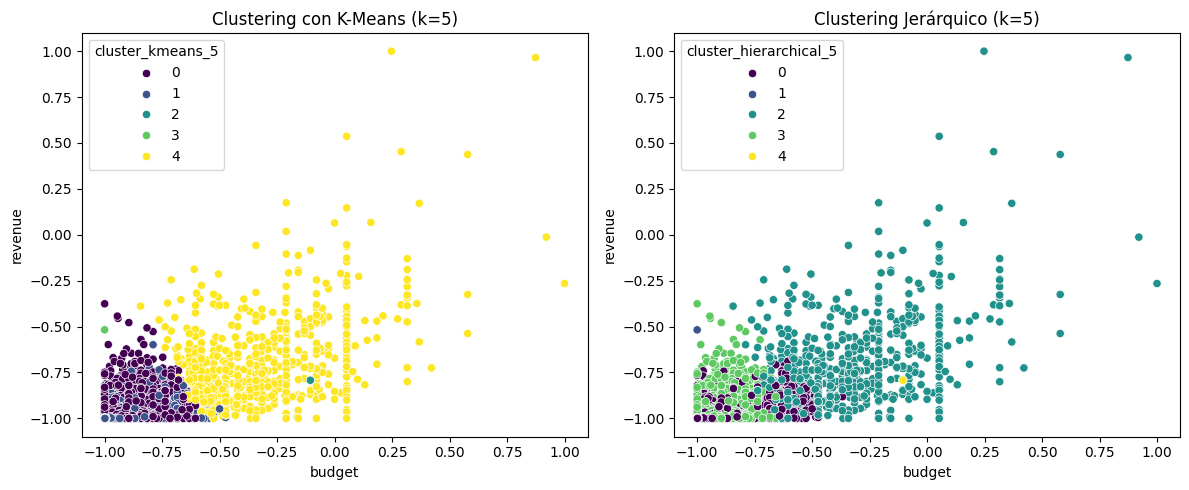

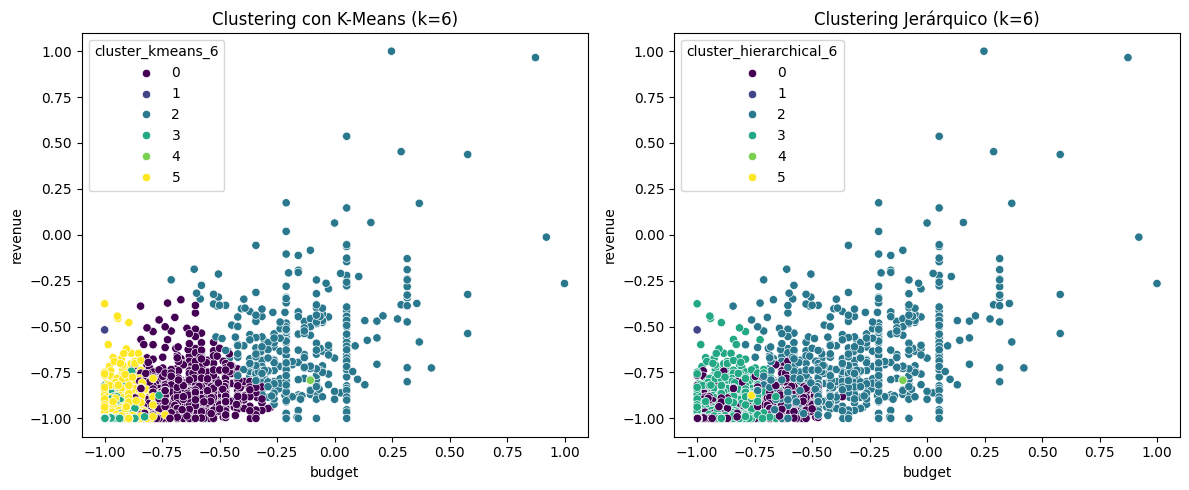

In [39]:
# Definir el rango de clusters a evaluar
k_values = range(2, 7)

# Crear figuras para comparar K-Means y Clustering Jerárquico para cada k
for k in k_values:
    # Aplicación de K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df[f'cluster_kmeans_{k}'] = kmeans.fit_predict(data_scaled)

    # Aplicación de Clustering Jerárquico
    hierarchical = AgglomerativeClustering(n_clusters=k)
    df[f'cluster_hierarchical_{k}'] = hierarchical.fit_predict(data_scaled)

    # Visualización
    plt.figure(figsize=(12, 5))

    # Visualización K-Means
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df[f'cluster_kmeans_{k}'], palette="viridis")
    plt.title(f"Clustering con K-Means (k={k})")
    plt.xlabel(columns_to_use[0])
    plt.ylabel(columns_to_use[1])

    # Visualización Clustering Jerárquico
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df[f'cluster_hierarchical_{k}'], palette="viridis")
    plt.title(f"Clustering Jerárquico (k={k})")
    plt.xlabel(columns_to_use[0])
    plt.ylabel(columns_to_use[1])

    plt.tight_layout()
    plt.show()


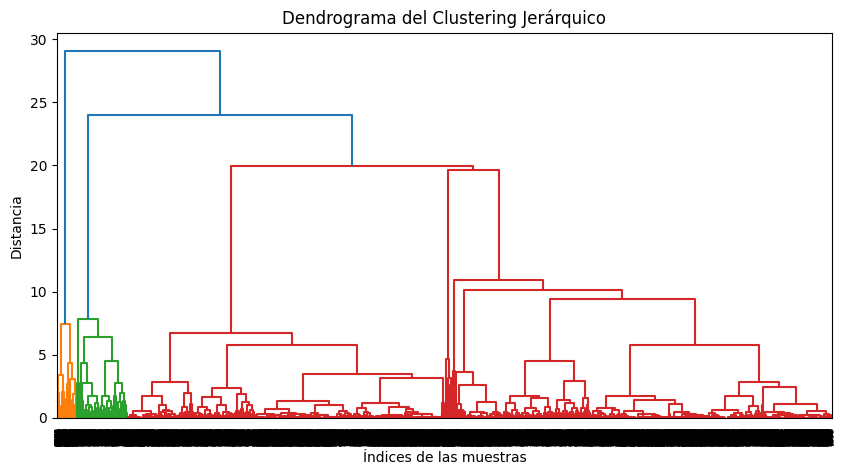

,cluster_kmeans,cluster_hierarchical
0,1,0
1,1,0
2,1,3
3,0,2
4,0,2


In [42]:
# Aplicación de K-Means con el número óptimo de clusters (suponiendo k=4 basado en el codo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans.fit_predict(data_scaled)

# Aplicación de clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4)
df['cluster_hierarchical'] = hierarchical.fit_predict(data_scaled)

# Visualización del dendrograma
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia')
plt.show()  # Mostrar directamente en el notebook

# Mostrar las primeras filas con las asignaciones de clusters
df[['cluster_kmeans', 'cluster_hierarchical']].head()



1.5. Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. 
Discuta los resultados.


Para n_clusters = 2, el coeficiente de silueta promedio es: 0.7423
Para n_clusters = 3, el coeficiente de silueta promedio es: 0.5649
Para n_clusters = 4, el coeficiente de silueta promedio es: 0.3946
Para n_clusters = 5, el coeficiente de silueta promedio es: 0.4132
Para n_clusters = 6, el coeficiente de silueta promedio es: 0.4294


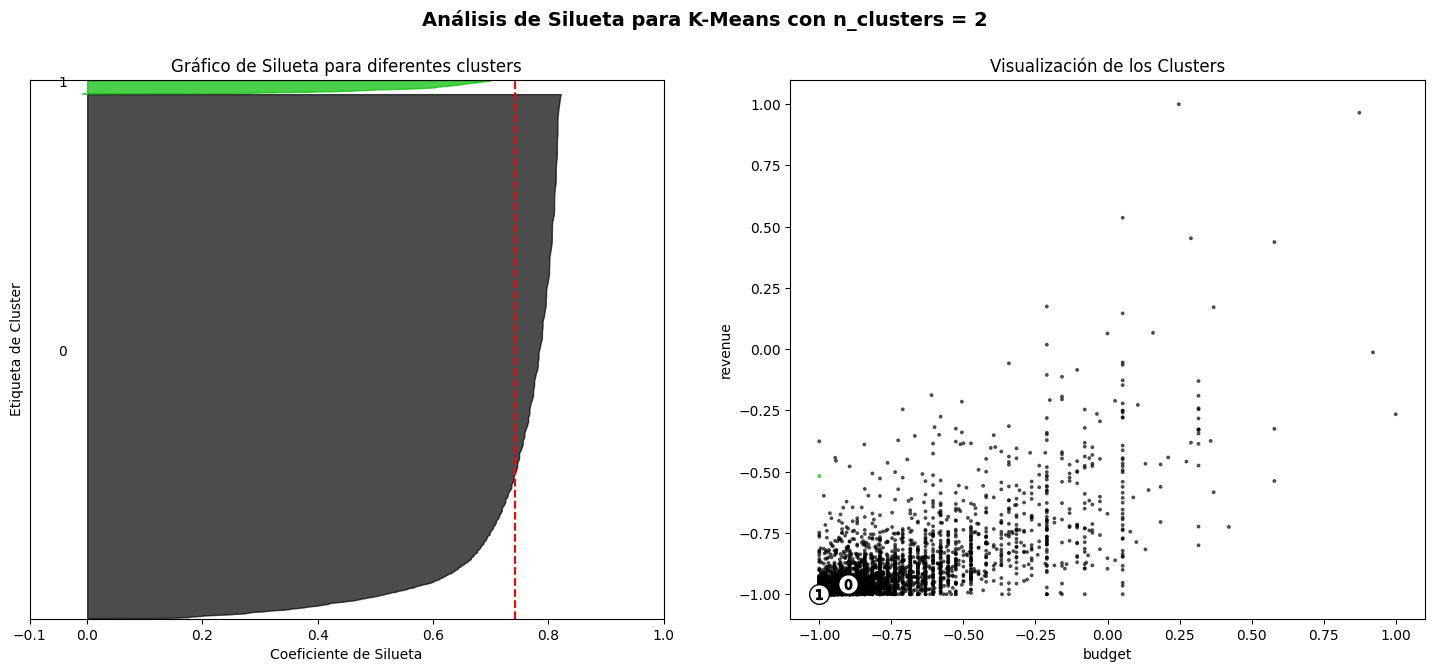

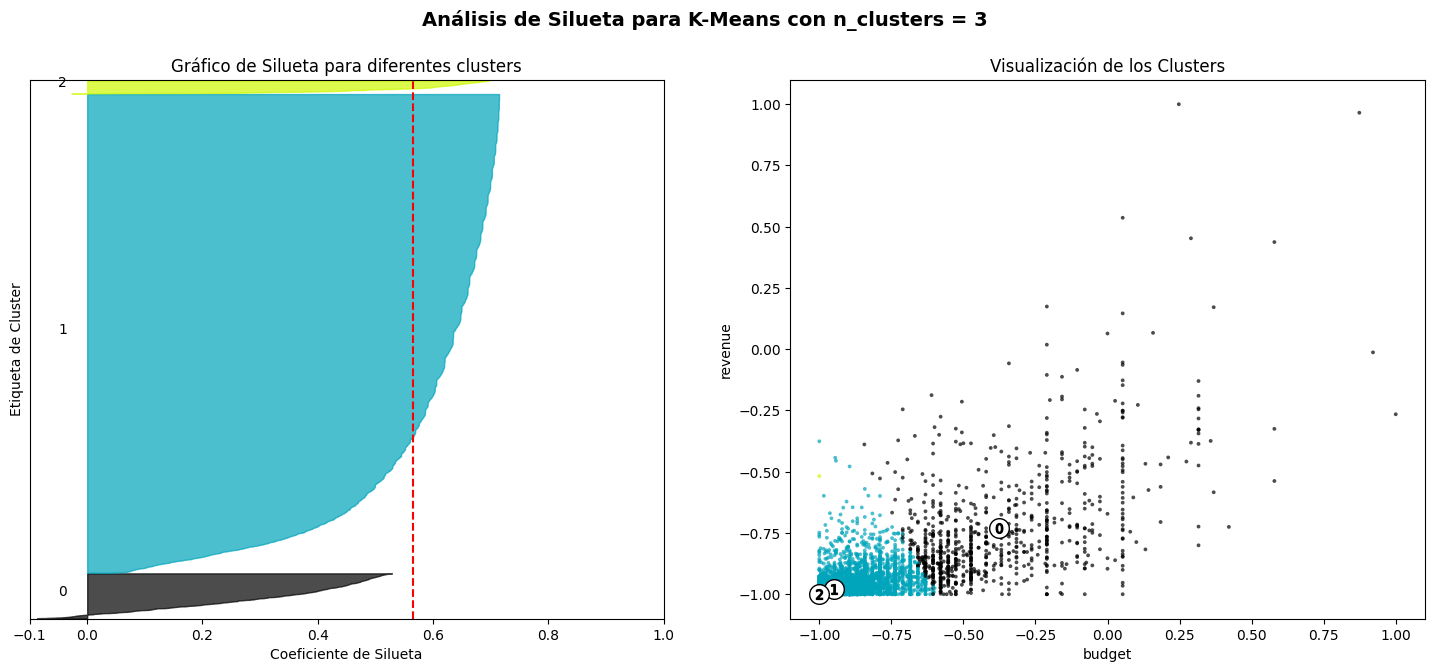

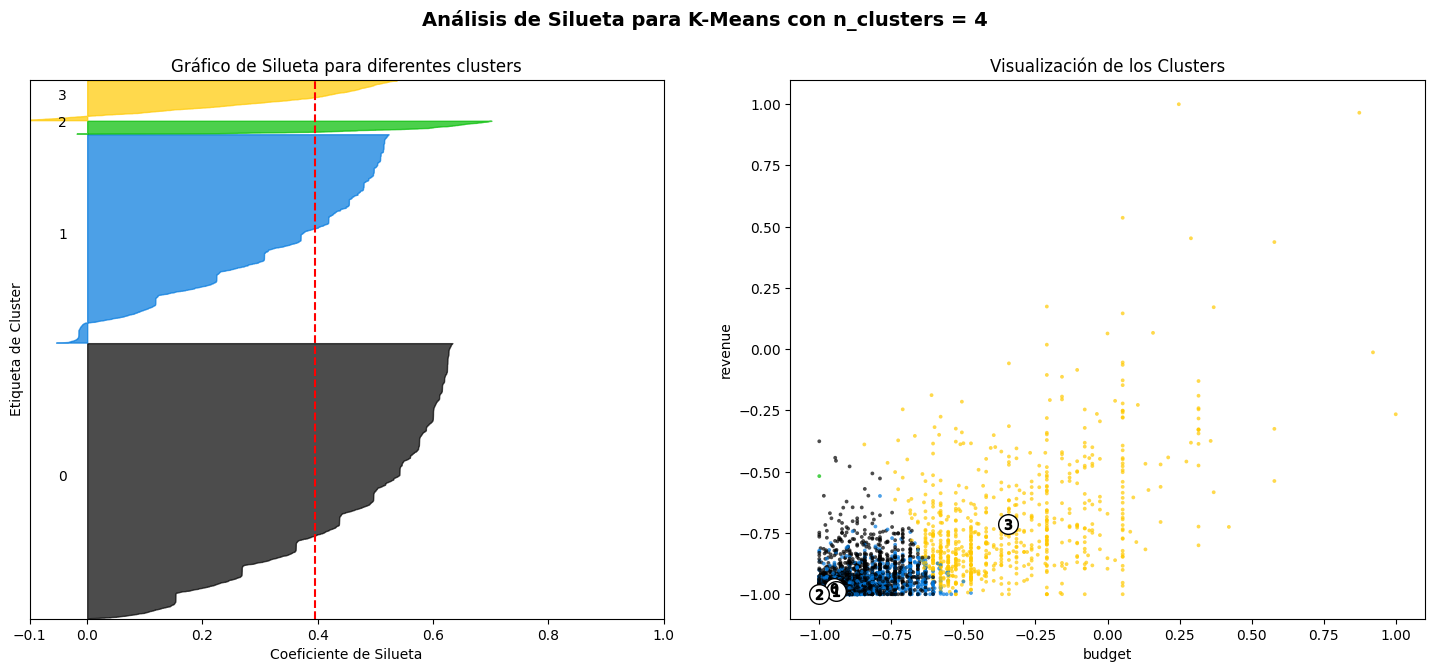

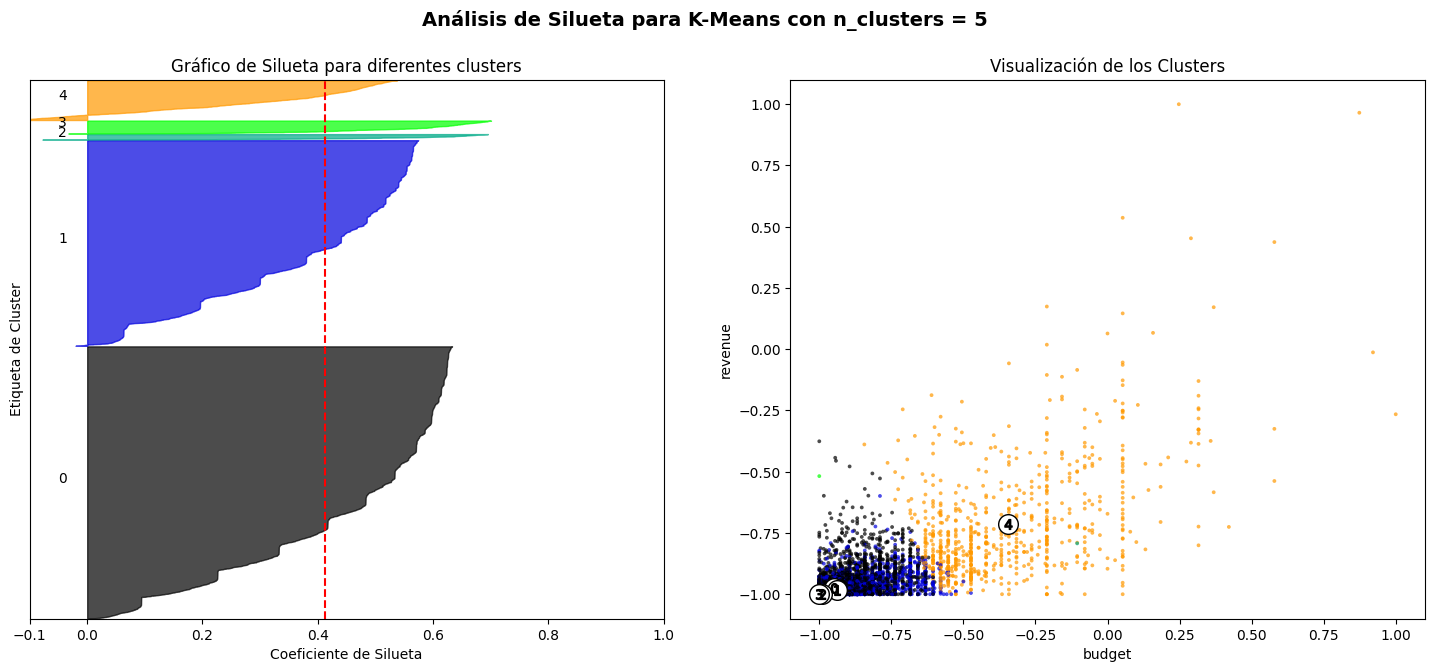

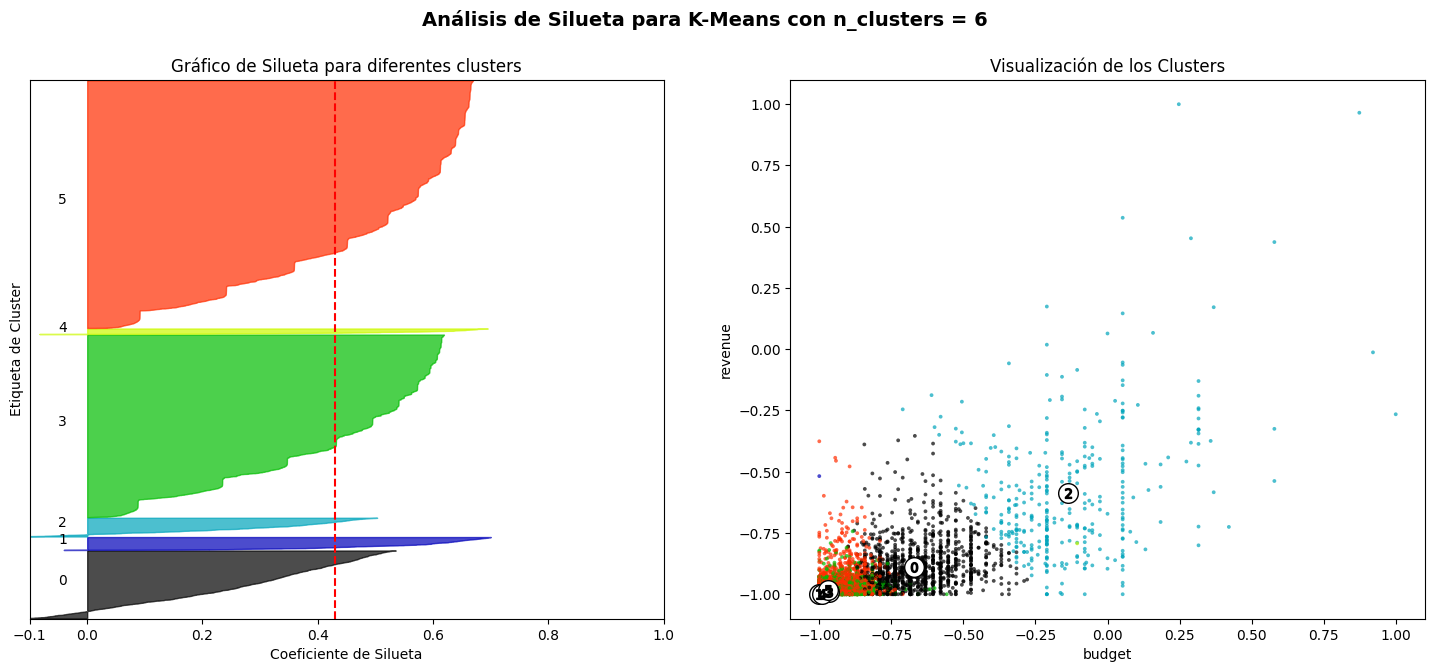

In [40]:
# Rango de clusters a evaluar
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crear una figura con dos subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Configuración del gráfico de silueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

    # Aplicar K-Means
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(data_scaled)

    # Calcular el coeficiente de silueta promedio
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es: {silhouette_avg:.4f}")

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Obtener los valores de silueta del cluster actual y ordenarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetar los clusters en el gráfico
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Espaciado entre clusters

    ax1.set_title("Gráfico de Silueta para diferentes clusters")
    ax1.set_xlabel("Coeficiente de Silueta")
    ax1.set_ylabel("Etiqueta de Cluster")

    # Línea roja para el coeficiente de silueta promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Gráfico de dispersión de los clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Centros de los clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualización de los Clusters")
    ax2.set_xlabel(columns_to_use[0])
    ax2.set_ylabel(columns_to_use[1])

    plt.suptitle(f"Análisis de Silueta para K-Means con n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

plt.show()

El mejor coeficiente de silueta se obtuvo con 3 clusters (0.5306) y 5 clusters (0.5260), lo que indica que estos valores de k generan mejores agrupamientos. En cambio, 4 clusters (0.1755) tiene una baja calidad, sugiriendo que no es una buena opción. Basado en estos resultados, 3 o 5 clusters serían más adecuados para el análisis.


1.6. Interprete los grupos basado en el conocimiento que tiene de los datos. Recuerde investigar las 
medidas de tendencia central de las variables continuas y las tablas de frecuencia de las 
variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a 
las agrupaciones y describa para qué le podría servir. 


# PCA

3.1 Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

Para el Análisis de Componentes Principales (PCA), se utilizarán las variables genres, productionCompany, productionCompanyCountry y productionCountry. Incluimos genres, ya que los géneros de una película son clave para entender su clasificación y atractivo, influyendo en la audiencia y en la popularidad. Por otro lado, productionCompany es relevante porque la compañía de producción puede afectar la calidad y el éxito de una película; algunas son reconocidas por producir obras de alta calidad o de ciertos géneros, lo que puede revelar patrones en el rendimiento. Asimismo, productionCompanyCountry aporta información sobre el país de la compañía productora, lo que puede influir en el estilo y la temática de las películas, reflejando características culturales que impactan su recepción. Finalmente, productionCountry es importante porque el país de producción puede determinar la percepción y el éxito de una película, ya que las producciones de diferentes países pueden tener estilos distintivos que resuenan con diversas audiencias.

3.2. Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que
puede usar el índice KMO y el test de esfericidad de Bartlett.

In [57]:
# Cargar el dataset
file_path = "movies.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

# Mostrar las primeras filas para exploración
df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,9/12/1995,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,15/10/1993,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,25/05/1977,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,30/05/2003,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,6/07/1994,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


In [67]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Definir las columnas numéricas relevantes para PCA
data_pca = ['budget', 'revenue', 'popularity', 'voteAvg', 'productionCoAmount', 'productionCountriesAmount',
            'actorsAmount', 'castWomenAmount', 'castMenAmount']

# Filtrar columnas que existen en el dataset y son numéricas
data_pca = [col for col in data_pca if col in df.columns]
pca_data = df[data_pca].select_dtypes(include=[np.number]).copy()

# Reemplazar valores nulos con 0 y verificar datos
pca_data.fillna(0, inplace=True)

# Mostrar información para verificar la estructura
print("Resumen de las variables para PCA:")
print(pca_data.info())
print(pca_data.describe())

# Mostrar las primeras filas del dataset preprocesado
pca_data.head()


Resumen de las variables para PCA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   budget                     10000 non-null  int64  
 1   revenue                    10000 non-null  float64
 2   popularity                 10000 non-null  float64
 3   voteAvg                    10000 non-null  float64
 4   productionCoAmount         10000 non-null  float64
 5   productionCountriesAmount  10000 non-null  float64
 6   actorsAmount               10000 non-null  float64
 7   castWomenAmount            10000 non-null  float64
 8   castMenAmount              10000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 703.2 KB
None
             budget       revenue    popularity       voteAvg  \
count  1.000000e+04  1.000000e+04  10000.000000  10000.000000   
mean   1.855163e+07  5.673753e+07     51.387272      6.

,budget,revenue,popularity,voteAvg,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,4257354.0,20.880,5.7,2.0,1.0,25.0,15.0,9.0
1,21000000,12136938.0,9.596,6.5,3.0,2.0,15.0,3.0,9.0
2,11000000,775398007.0,100.003,8.2,2.0,1.0,105.0,5.0,62.0
3,94000000,940335536.0,134.435,7.8,1.0,1.0,24.0,5.0,18.0
4,55000000,677387716.0,58.751,8.5,2.0,1.0,76.0,18.0,48.0


**Test de efericidad Bartlett**

In [64]:
# Crear una copia para evitar modificar `pca_data` original
pca_data_clean = pca_data.copy()

# Verificar si hay columnas con varianza 0 y eliminarlas (Bartlett no las admite)
constant_cols = pca_data_clean.var()[pca_data_clean.var() == 0].index
if len(constant_cols) > 0:
    print(f"Se eliminaron columnas constantes: {list(constant_cols)}")
    pca_data_clean.drop(columns=constant_cols, inplace=True)

# Eliminar filas con valores nulos
pca_data_clean.dropna(inplace=True)

# Calcular el Test de Esfericidad de Bartlett
chi_cuadrado, p_valor = calculate_bartlett_sphericity(pca_data_clean)

# Mostrar resultados
print(f'Valor Chi-cuadrado: {chi_cuadrado:.4f}')
print(f'Valor p: {p_valor:.4f}')

# Interpretación del p-valor
if p_valor < 0.05:
    print("Bartlett sugiere que PCA es adecuado (p < 0.05)")
else:
    print("Bartlett sugiere que PCA NO es adecuado (p >= 0.05)")

Valor Chi-cuadrado: 320.7612
Valor p: 0.0000
Bartlett sugiere que PCA es adecuado (p < 0.05)


**Indice KMO**

In [65]:
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler

# Crear una copia de las columnas numéricas para PCA
pca_data = df[data_pca].select_dtypes(include=[np.number]).copy()

# Reemplazar valores nulos con 0
pca_data.fillna(0, inplace=True)

# Escalar los datos para mejorar la precisión del cálculo KMO
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Calcular el índice KMO
kmo_all, kmo_modelo = calculate_kmo(pca_data_scaled)

# Mostrar resultado
print(f'Índice KMO: {kmo_modelo:.4f}')

# Interpretación del índice KMO
if kmo_modelo >= 0.90:
    print("Excelente: Las variables están altamente correlacionadas. Es ideal para PCA.")
elif kmo_modelo >= 0.80:
    print("Muy bueno: Se puede aplicar PCA sin problemas.")
elif kmo_modelo >= 0.70:
    print("Regular: PCA es útil, pero no es perfecto.")
elif kmo_modelo >= 0.60:
    print("Es recomendable revisar los datos antes de aplicar PCA.")
else:
    print("Pobre: No es recomendable aplicar PCA.")


Índice KMO: 0.5253
Pobre: No es recomendable aplicar PCA.


```
Valor KMO	    Interpretación
0.90 - 1.00	    Excelente → Las variables están muy correlacionadas. ¡Perfecto para PCA!
0.80 - 0.89	    Muy bueno → Puedes aplicar PCA sin problema.
0.70 - 0.79	    Aceptable → PCA es útil, pero no perfecto.
0.60 - 0.69	    Regular → Considera revisar tus datos antes de aplicar PCA.
0.50 - 0.59	    Pobre → No es recomendable aplicar PCA.
< 0.50	        Inaceptable → No uses PCA, tus datos no están correlacionados.
```

Dado el índice kmo podemos decir que se considera Regular → Por lo que no es tan factible utilizar PCA.

3.3 Haga un análisis de componentes principales con las variables numéricas, discuta los
resultados e interprete los componentes